In [98]:
from tensorboard.backend.event_processing import event_accumulator
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import matplotlib.pyplot as plt
import os

tone_curve_name = "tone_EmbedLSTM_42_1e-05_0.85"
emb_curve_name = "emb"
sft_curve_name = "sft_lora_4e-5_0.5"

In [99]:
tone_curve_dir = os.path.join("logs", tone_curve_name)
emb_curve_dir = os.path.join("logs", emb_curve_name)
sft_curve_dir = os.path.join("logs", sft_curve_name)

# Read Tone Curve

In [100]:
tone_curve = event_accumulator.EventAccumulator(tone_curve_dir)
tone_curve.Reload()

tone_curve.scalars.Keys()

['Train/accuracy',
 'Train/precision',
 'Train/recall',
 'Train/f1',
 'Train/each_0',
 'Train/each_1',
 'Train/each_2',
 'Train/each_3',
 'Train/loss',
 'Val/accuracy',
 'Val/precision',
 'Val/recall',
 'Val/f1',
 'Val/each_0',
 'Val/each_1',
 'Val/each_2',
 'Val/each_3',
 'Val/loss']

- Accuracy
- Loss
- Precision
- Recall
- F1-each/all-train
- F1-each/all val

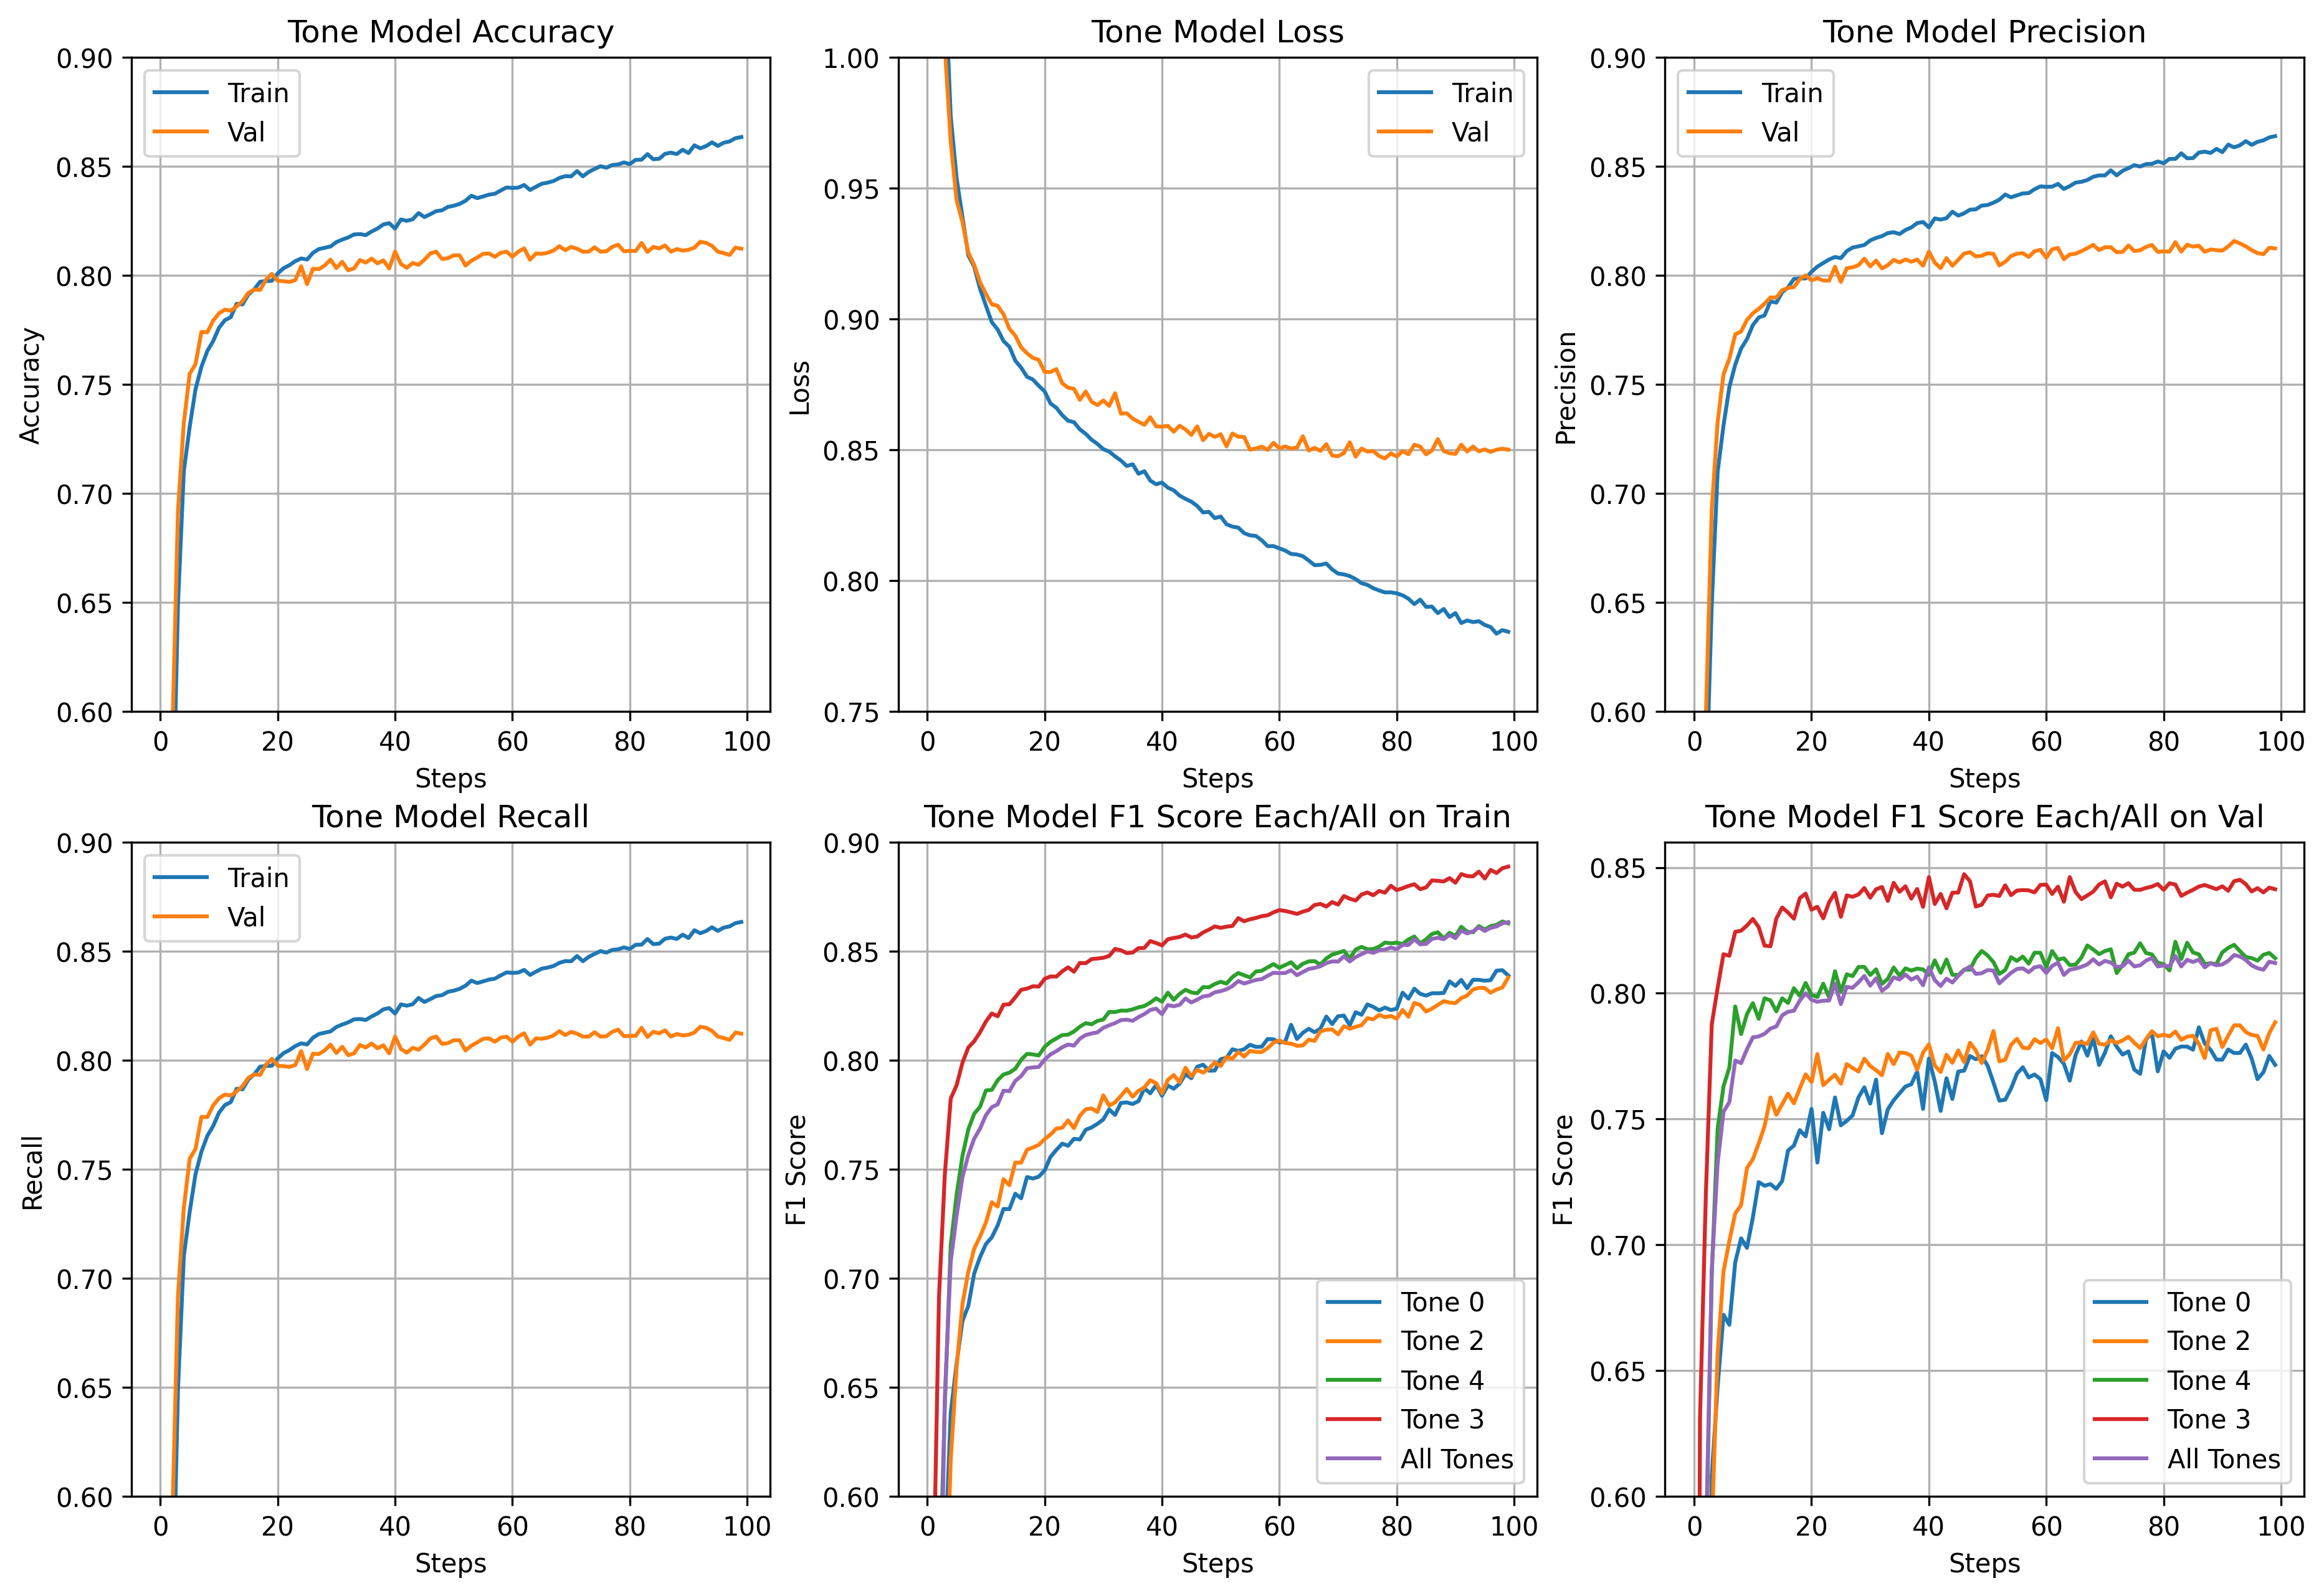

In [101]:
def read_curve(curve_set : EventAccumulator, curve_name: str):
	curve_data = curve_set.scalars.Items(curve_name)
	steps = [item.step for item in curve_data]
	values = [item.value for item in curve_data]
	return steps, values

def plot(steps, values, label: str | None = None):
	plt.plot(steps, values, label=label)

# plot accuracy
plt.figure(figsize=(15, 10), dpi=300)
plt.subplot(2, 3, 1)
steps, values = read_curve(tone_curve, "Train/accuracy")
plot(steps, values, label="Train")
steps, values = read_curve(tone_curve, "Val/accuracy")
plot(steps, values, label="Val")
plt.title("Tone Model Accuracy")
plt.xlabel("Steps")
plt.ylabel("Accuracy")
plt.ylim(0.6, 0.9)
plt.legend()
plt.grid()

# plot loss
plt.subplot(2, 3, 2)
steps, values = read_curve(tone_curve, "Train/loss")
plot(steps, values, label="Train")
steps, values = read_curve(tone_curve, "Val/loss")
plot(steps, values, label="Val")
plt.title("Tone Model Loss")
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.ylim(0.75, 1)
plt.grid()
plt.legend()

# plot precision
plt.subplot(2, 3, 3)
steps, values = read_curve(tone_curve, "Train/precision")
plot(steps, values, label="Train")
steps, values = read_curve(tone_curve, "Val/precision")
plot(steps, values, label="Val")
plt.title("Tone Model Precision")
plt.xlabel("Steps")
plt.ylabel("Precision")
plt.ylim(0.6, 0.9)
plt.grid()
plt.legend()

# plot recall
plt.subplot(2, 3, 4)
steps, values = read_curve(tone_curve, "Train/recall")
plot(steps, values, label="Train")
steps, values = read_curve(tone_curve, "Val/recall")
plot(steps, values, label="Val")
plt.title("Tone Model Recall")
plt.xlabel("Steps")
plt.ylabel("Recall")
plt.ylim(0.6, 0.9)
plt.grid()
plt.legend()

# plot F1-each/all-train
tone_name = ['0', '2', '4', '3']
plt.subplot(2, 3, 5)
for idx, name in zip(range(0, 4), tone_name):
	steps, values = read_curve(tone_curve, f"Train/each_{idx}")
	plot(steps, values, label=f"Tone {name}")
steps, values = read_curve(tone_curve, "Train/f1")
plot(steps, values, label="All Tones")
plt.title("Tone Model F1 Score Each/All on Train")
plt.xlabel("Steps")
plt.ylabel("F1 Score")
plt.ylim(0.6, 0.9)
plt.grid()
plt.legend()

# plot F1-each/all-val
plt.subplot(2, 3, 6)
for idx, name in zip(range(0, 4), tone_name):
	steps, values = read_curve(tone_curve, f"Val/each_{idx}")
	plot(steps, values, label=f"Tone {name}")
steps, values = read_curve(tone_curve, "Val/f1")
plot(steps, values, label="All Tones")
plt.title("Tone Model F1 Score Each/All on Val")
plt.xlabel("Steps")
plt.ylabel("F1 Score")
plt.ylim(0.6, 0.86)
plt.grid()
plt.legend()

plt.show()

# Curves of Lyrics Model
- Loss - Train
- Loss - eval
- mean-token-accuracy - Train
- mean-token-accuracy - Eval

In [102]:
emb_curves = event_accumulator.EventAccumulator(emb_curve_dir)
emb_curves.Reload()
emb_curves.scalars.Keys()

['train/loss',
 'train/grad_norm',
 'train/learning_rate',
 'train/entropy',
 'train/num_tokens',
 'train/mean_token_accuracy',
 'train/epoch',
 'train/train_runtime',
 'train/train_samples_per_second',
 'train/train_steps_per_second',
 'train/total_flos',
 'train/train_loss']

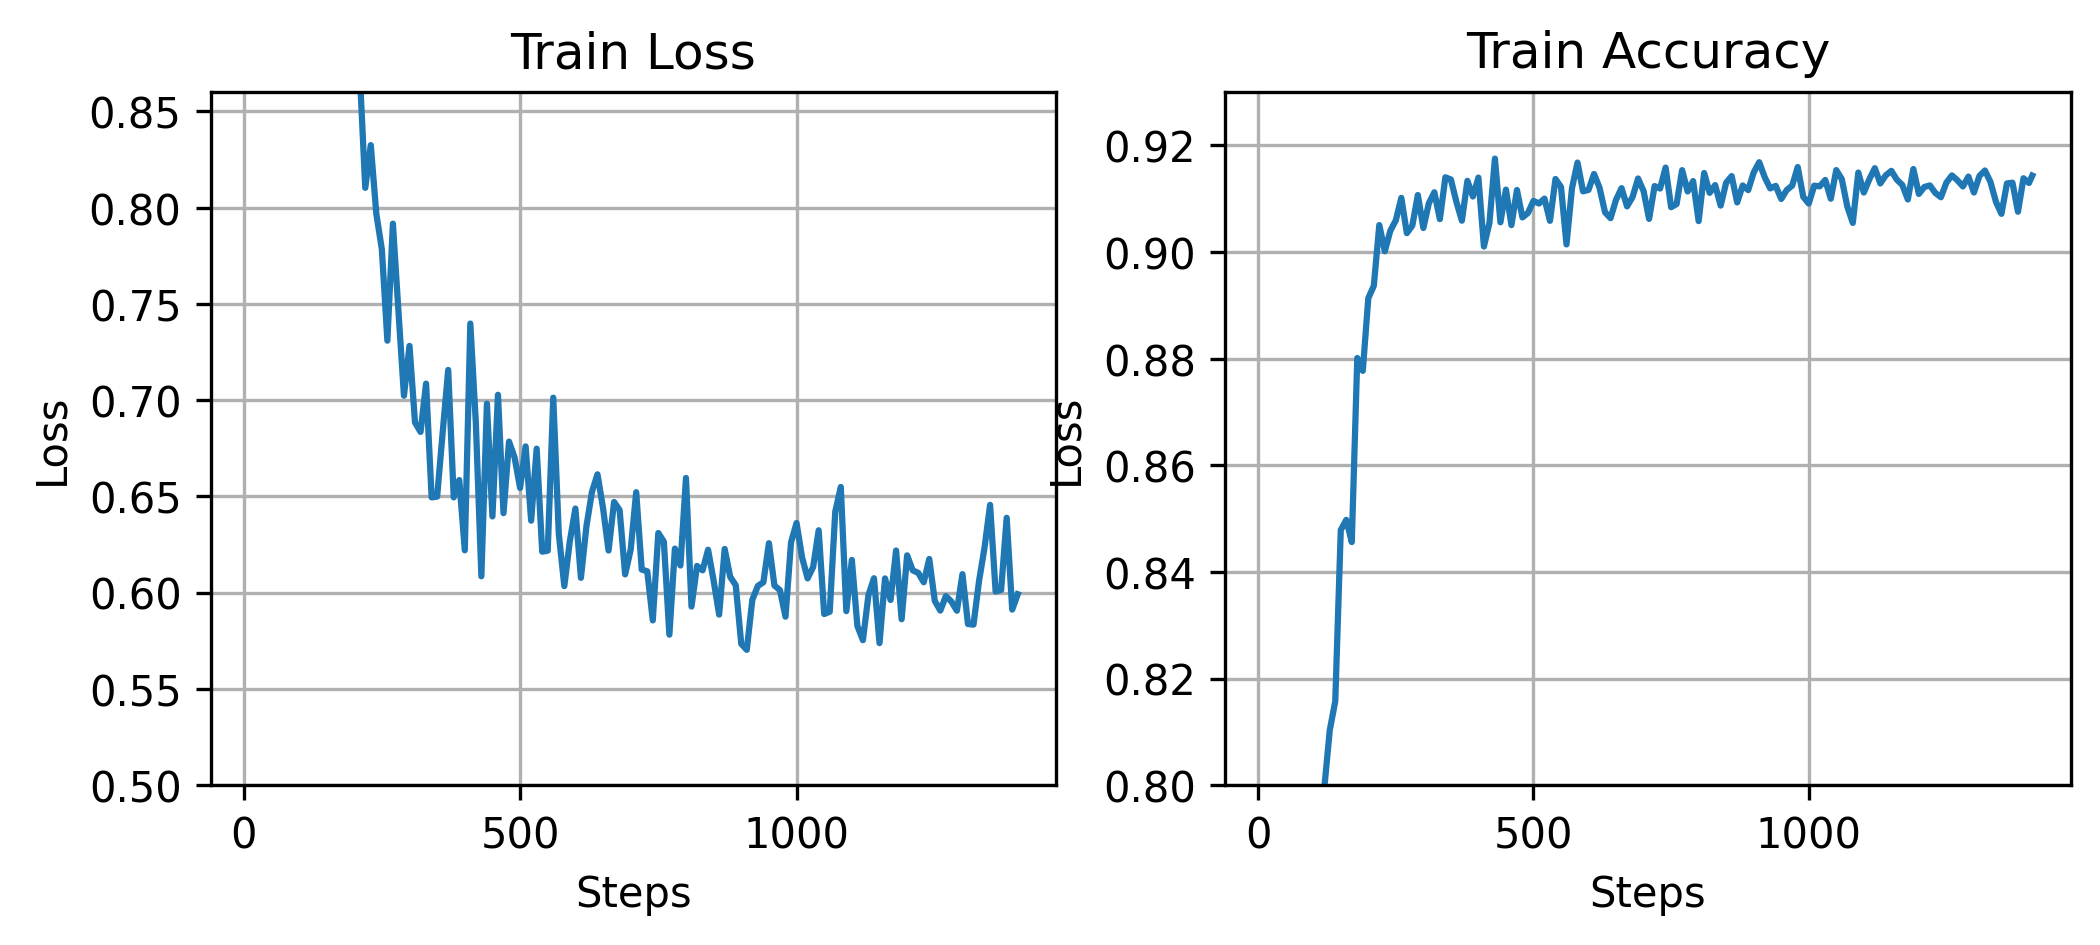

In [103]:
plt.figure(figsize=(8, 3), dpi=300)
plt.subplot(1, 2, 1)
steps, values = read_curve(emb_curves, "train/loss")
plot(steps, values)
plt.title("Train Loss")
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.ylim(0.5, 0.86)
plt.grid()

plt.subplot(1, 2, 2)
steps, values = read_curve(emb_curves, "train/mean_token_accuracy")
plot(steps, values)
plt.title("Train Accuracy")
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.ylim(0.8, 0.93)
plt.grid()

plt.show()

In [104]:
sft_curves = event_accumulator.EventAccumulator(sft_curve_dir)
sft_curves.Reload()
sft_curves.scalars.Keys()

['train/loss',
 'train/grad_norm',
 'train/learning_rate',
 'train/entropy',
 'train/num_tokens',
 'train/mean_token_accuracy',
 'train/epoch',
 'eval/loss',
 'eval/runtime',
 'eval/samples_per_second',
 'eval/steps_per_second',
 'eval/entropy',
 'eval/num_tokens',
 'eval/mean_token_accuracy',
 'train/train_runtime',
 'train/train_samples_per_second',
 'train/train_steps_per_second',
 'train/total_flos',
 'train/train_loss']

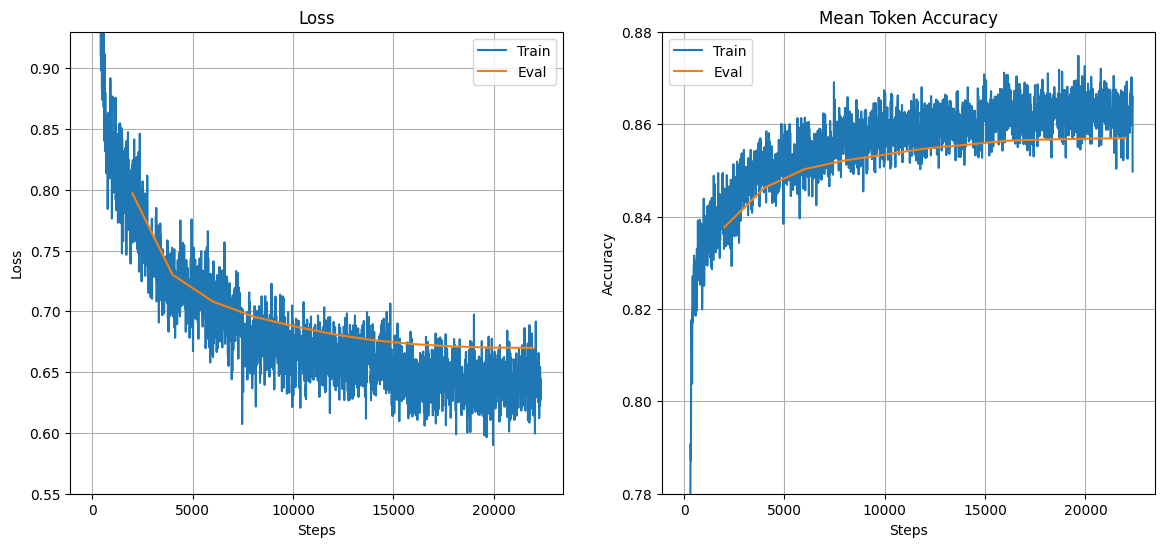

In [113]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
steps, values = read_curve(sft_curves, "train/loss")
plot(steps, values, "Train")
steps, values = read_curve(sft_curves, "eval/loss")
plot(steps, values, "Eval")
plt.title("Loss")
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.ylim(0.55, 0.93)
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
steps, values = read_curve(sft_curves, "train/mean_token_accuracy")
plot(steps, values, "Train")
steps, values = read_curve(sft_curves, "eval/mean_token_accuracy")
plot(steps, values, "Eval")
plt.title("Mean Token Accuracy")
plt.xlabel("Steps")
plt.ylabel("Accuracy")
plt.ylim(0.78, 0.88)
plt.legend()
plt.grid()

plt.show()